# Import Library

In [86]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats # QQ Plot

# Exploratory Data Analyst

## Gathering Dataset

In [87]:
df = pd.read_csv('california_dataset.csv')

## Assesing Dataset

In [88]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [89]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [90]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
4280,2.0341,32.0,3.043243,1.032432,626.0,3.383784,34.09,-118.32,2.500
18639,4.8269,25.0,5.351351,0.897297,522.0,2.821622,37.00,-121.97,2.729
11891,2.0250,52.0,8.375000,1.833333,130.0,5.416667,33.98,-117.37,1.250
2424,1.4937,20.0,4.570552,0.975460,1474.0,4.521472,36.61,-119.54,0.547
9893,2.9643,48.0,5.028698,1.052980,1219.0,2.690949,38.29,-122.30,1.540


In [91]:
df.shape

(20640, 9)

In [92]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   house_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [94]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
house_price    0
dtype: int64

In [95]:
df.duplicated().sum()

0

## Cleansing Dataset

1. Outlier Handling

In [96]:
# Handling outlier dengan proses Trimming dataset.
df = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'house_price']]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [97]:
# Spliting Data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [98]:
train.shape, test.shape

((16512, 7), (4128, 7))

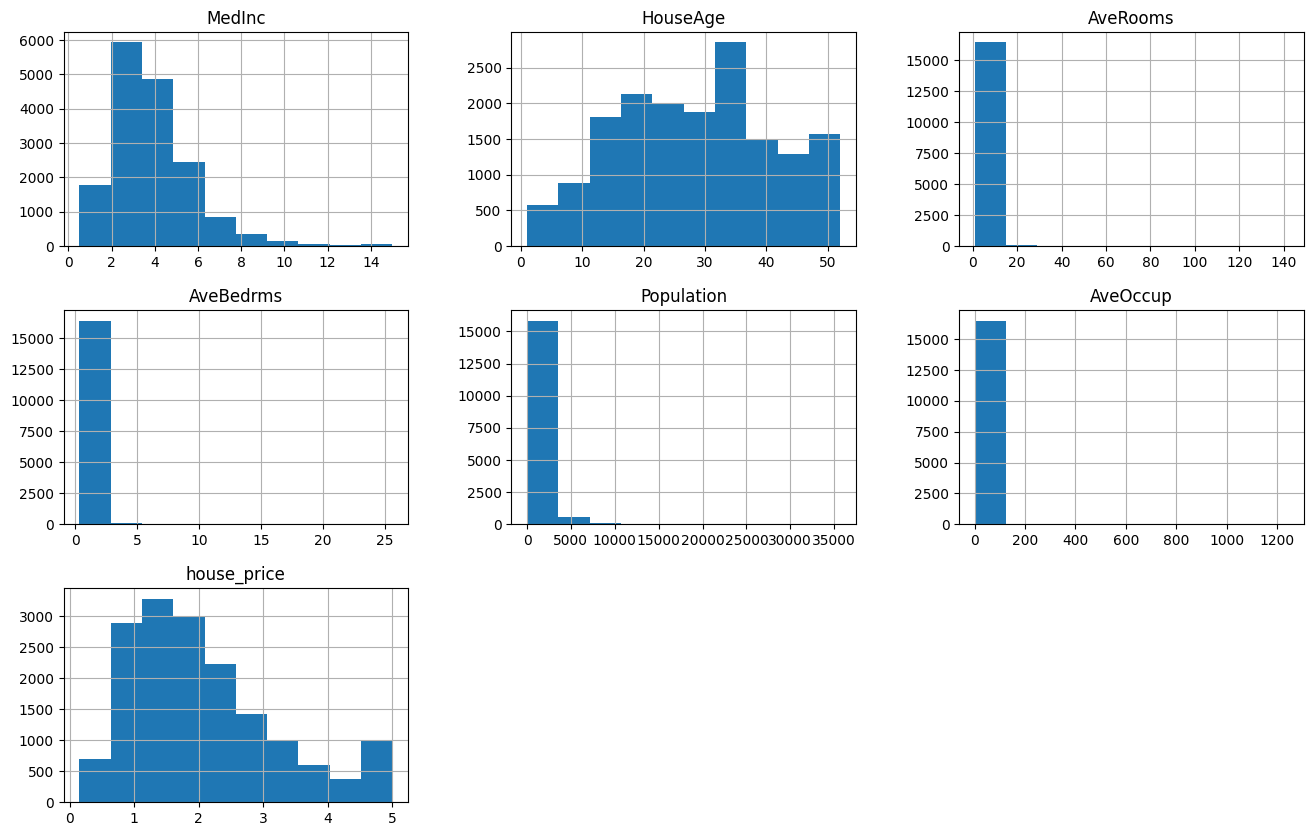

In [99]:
train.hist(figsize=(16,10))
plt.show()

In [100]:
# Fungsi Visualisasi dari setiap kolom
# Menampilkan berdasarkan Histogram, QQ plot dan Boxplot

def plot_diagnosa(train, nama_kolom):
    
    # atur ukuran gambar
    plt.figure(figsize=(16,4))

    # histogram
    plt.subplot(1,3,1)
    sns.histplot(train[nama_kolom], bins=30)
    plt.title('Histogram')

    # plot QQ
    plt.subplot(1,3,2)
    stats.probplot(train[nama_kolom], dist='norm', plot=plt)
    plt.ylabel('Variabel Quantiles')

    # Box plot
    plt.subplot(1,3,3)
    sns.boxplot(y=train[nama_kolom])
    plt.title('Box Plot')

    plt.show()

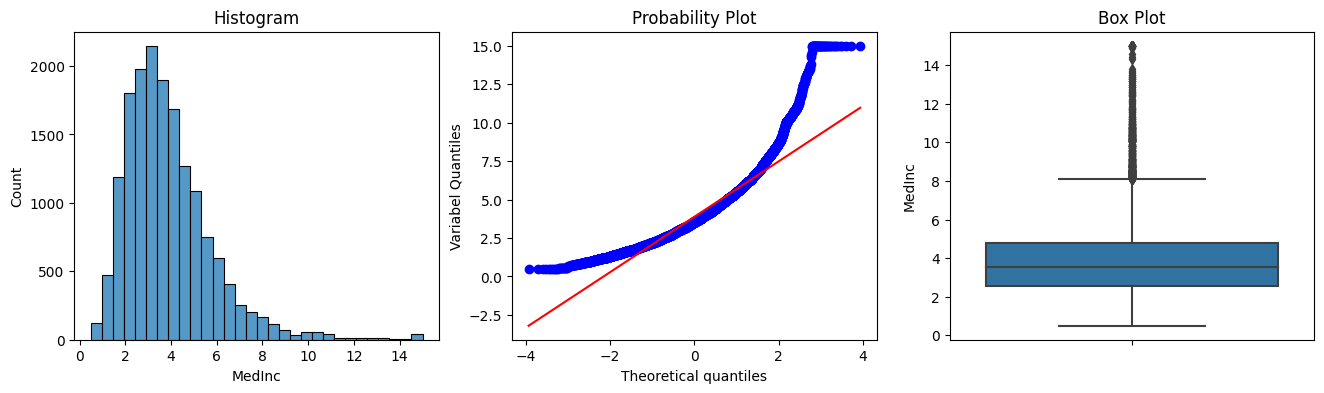

In [101]:
plot_diagnosa(train, 'MedInc')

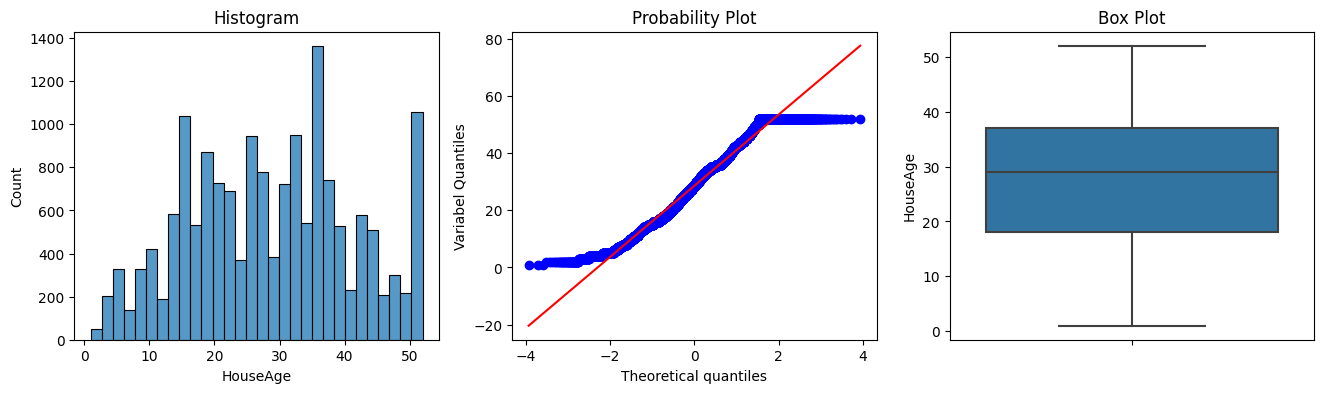

In [102]:
plot_diagnosa(train, 'HouseAge')

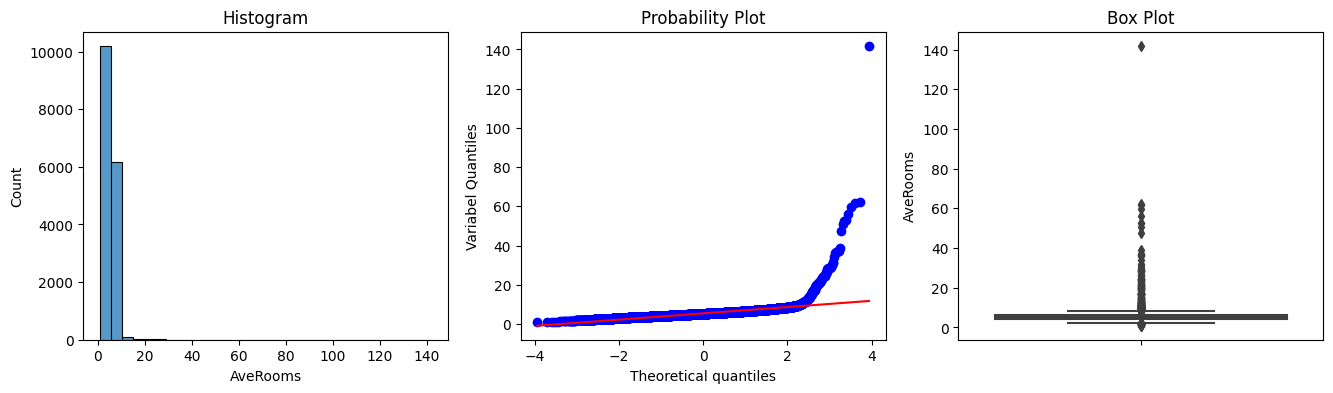

In [103]:
plot_diagnosa(train, 'AveRooms')

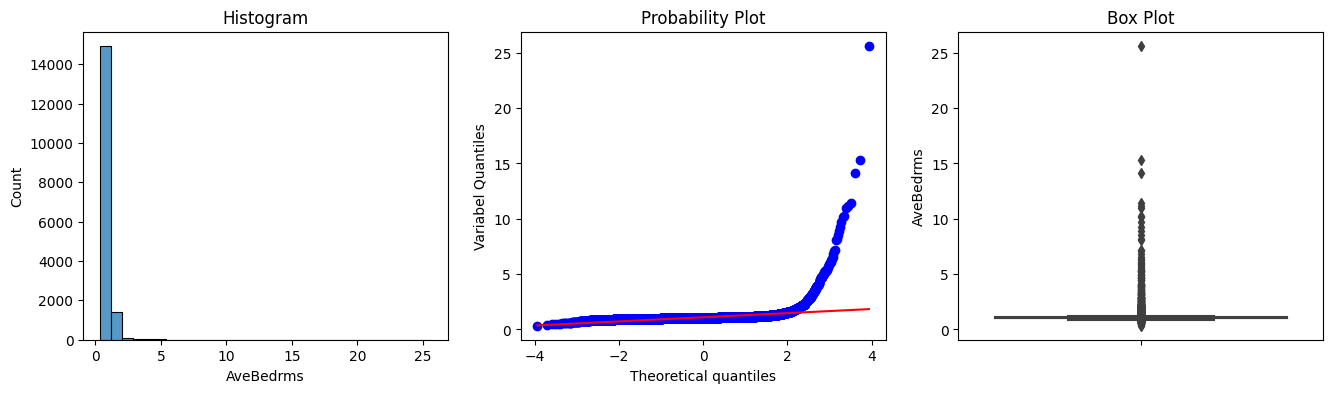

In [104]:
plot_diagnosa(train, 'AveBedrms')

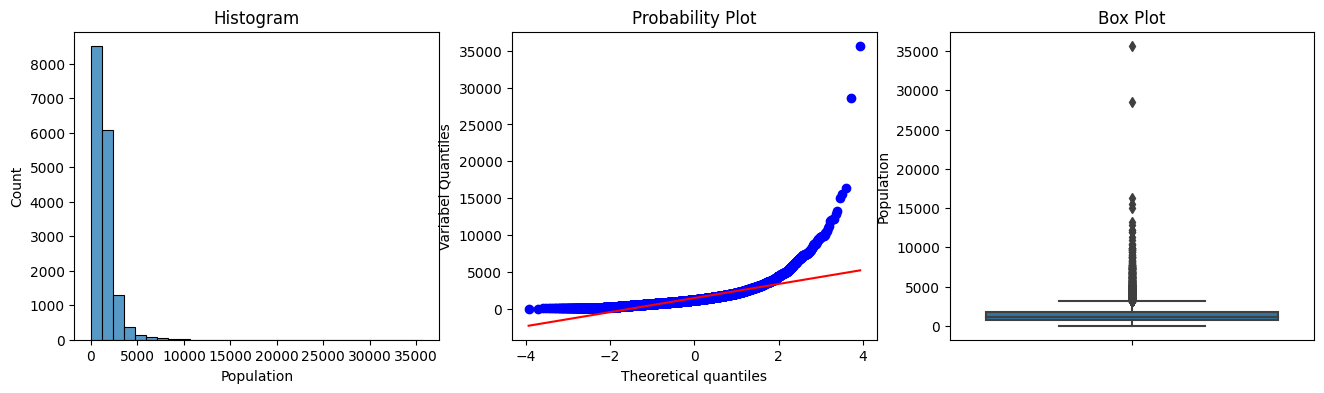

In [105]:
plot_diagnosa(train, 'Population')

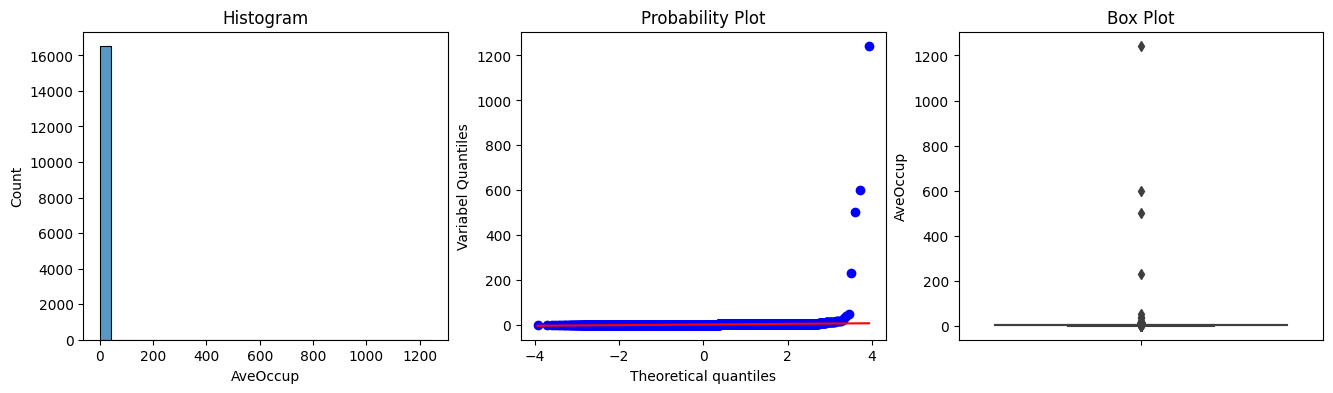

In [106]:
plot_diagnosa(train, 'AveOccup')

In [107]:
def batas_skew(train, nama_kolom, distance):

    # Mari kita hitung batas luar yang merupakan outlier
    # untuk distribusi yang miring

    # jarak yang dilewati sebagai argumen, memberi kita pilihan untuk melakukannya
    # perkirakan 1,5 kali atau 3 kali IQR yang akan dihitung
    # batas-batas.

    IQR = train[nama_kolom].quantile(0.75) - train[nama_kolom].quantile(0.25)

    lower_boundary = train[nama_kolom].quantile(0.25) - (IQR * distance)
    upper_boundary = train[nama_kolom].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [108]:
MedInc_upper_boundary, MedInc_lower_boundary = batas_skew(train, 'MedInc', 1.5)
HouseAge_upper_boundary, HouseAge_lower_boundary = batas_skew(train, 'HouseAge', 1.5)
AveRooms_upper_boundary, AveRooms_lower_boundary = batas_skew(train, 'AveRooms', 1.5)
AveBedrms_upper_boundary, AveBedrms_lower_boundary = batas_skew(train, 'AveBedrms', 1.5)
Population_upper_boundary, Population_lower_boundary = batas_skew(train, 'Population', 1.5)
AveOccup_upper_boundary, AveOccup_lower_boundary = batas_skew(train, 'AveOccup', 1.5)

In [109]:
print('Batas Atas, Batas Bawah')
print('MedInc', MedInc_upper_boundary, MedInc_lower_boundary)
print('HouseAge', HouseAge_upper_boundary, HouseAge_lower_boundary)
print('AveRooms', AveRooms_upper_boundary, AveRooms_lower_boundary)
print('AveBedrms', AveBedrms_upper_boundary, AveBedrms_lower_boundary)
print('Population', Population_upper_boundary, Population_lower_boundary)
print('AveOccup', AveOccup_upper_boundary, AveOccup_lower_boundary)

Batas Atas, Batas Bawah
MedInc 8.0828875 -0.7430125000000003
HouseAge 65.5 -10.5
AveRooms 8.474509781463325 2.0385818023548827
AveBedrms 1.2411074710635364 0.8657476648673017
Population 3131.5 -616.5
AveOccup 4.556801637852593 1.1519972702456773


In [110]:
outliers_MedInc = np.where(train['MedInc'] > MedInc_upper_boundary, True,
                       np.where(train['MedInc'] < MedInc_lower_boundary, True, False))

In [111]:
def deteksi_outlier(train, nama_kolom, upper_boundary, lower_boundary):
    outliers = np.where((train[nama_kolom] > upper_boundary) | (train[nama_kolom] < lower_boundary), True, False)
    return outliers

In [112]:
train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'house_price'],
      dtype='object')

In [113]:
outliers_MedInc = deteksi_outlier(train, 'MedInc', MedInc_upper_boundary,  MedInc_lower_boundary)
outliers_HouseAge = deteksi_outlier(train, 'HouseAge', HouseAge_upper_boundary,  HouseAge_lower_boundary)
outliers_AveRooms = deteksi_outlier(train, 'AveRooms', AveRooms_upper_boundary, AveRooms_lower_boundary)
outliers_AveBedrms = deteksi_outlier(train, 'AveBedrms', AveBedrms_upper_boundary,  AveBedrms_lower_boundary)
outliers_Population = deteksi_outlier(train, 'Population', Population_upper_boundary,  Population_lower_boundary)
outliers_MAveOccup = deteksi_outlier(train, 'AveOccup', AveOccup_upper_boundary,  AveOccup_lower_boundary)

In [114]:
outliers_MAveOccup

array([False, False, False, ..., False, False, False])

In [115]:
boston_train = train.loc[(~(outliers_MedInc + outliers_HouseAge + outliers_AveRooms + outliers_AveBedrms + outliers_Population + outliers_MAveOccup)),]
boston_train 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,house_price
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,0.965
...,...,...,...,...,...,...,...
6265,3.7708,34.0,5.336420,1.000000,1341.0,4.138889,1.635
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,2.292
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,2.221
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,2.835


In [116]:
train.shape, boston_train.shape

((16512, 7), (13460, 7))

In [117]:
boston_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'house_price'],
      dtype='object')

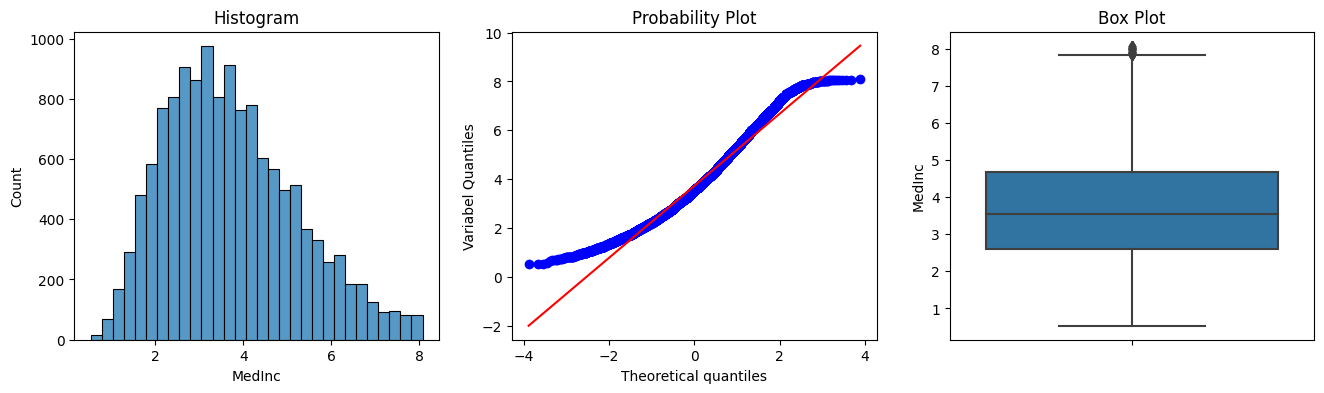

In [118]:
# Visualisasi data yang sudah di triming
plot_diagnosa(boston_train, 'MedInc')

In [119]:
boston_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,house_price
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,1.030
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,3.821
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,1.726
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,0.934
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,0.965
...,...,...,...,...,...,...,...
6265,3.7708,34.0,5.336420,1.000000,1341.0,4.138889,1.635
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,2.292
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,2.221
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,2.835


# Menentukan Feature


In [127]:
x_train = boston_train.drop(columns='house_price')
y_train = boston_train['house_price']

In [125]:
# Modeling
from sklearn.linear_model import LinearRegression

In [128]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [130]:
print('Koefisioen', LR.coef_)
print('intercept',LR.intercept_)

Koefisioen [ 6.56496928e-01  1.93621063e-02 -3.23408150e-01  2.31073510e+00
  9.93848562e-05 -4.17670381e-01]
intercept -0.6774413078401968


#Prediksi

In [131]:
x_test = test.drop(columns='house_price')
y_test = test['house_price']

In [132]:
y_pred = LR.predict(x_test)

In [137]:
y_pred

array([0.43560296, 1.72954785, 3.63009126, ..., 4.70593124, 1.44991905,
       1.68993643])

In [133]:
type(y_pred)

numpy.ndarray

In [134]:
y_pred.shape

(4128,)

In [136]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: house_price, Length: 4128, dtype: float64

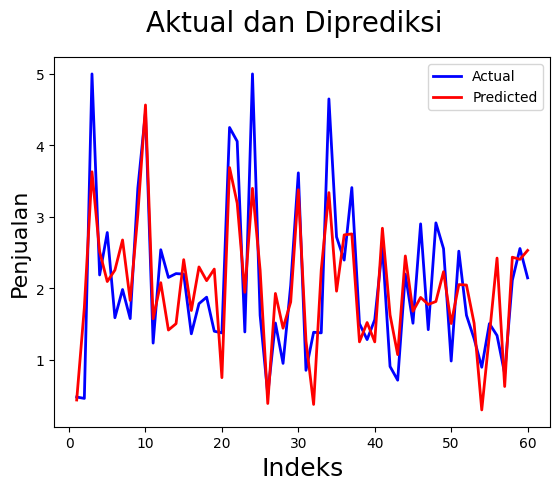

In [139]:
c = range(1, 61)  # Membuat indeks

# Pilih hanya 60 elemen pertama dari y_pred dan y_test untuk diplot
fig = plt.figure()
plt.plot(c, y_test[:60], color="blue", linewidth=2, linestyle="-", label="Actual")
plt.plot(c, y_pred[:60], color="red", linewidth=2, linestyle="-", label="Predicted")
fig.suptitle('Aktual dan Diprediksi', fontsize=20)  # Judul plot
plt.xlabel('Indeks', fontsize=18)  # Label X
plt.ylabel('Penjualan', fontsize=16)  # Label Y
plt.legend()  # Menambahkan legenda
plt.show()

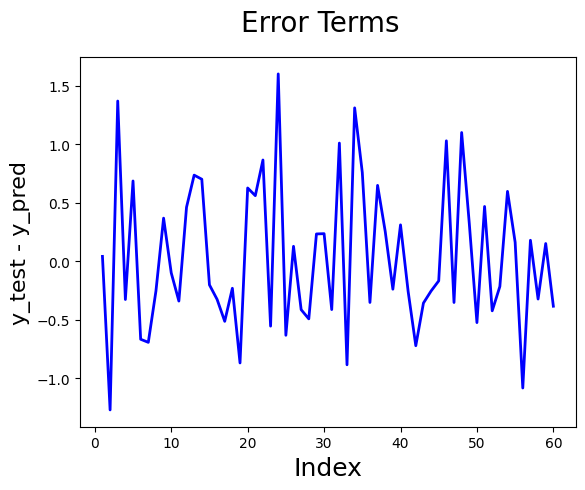

In [143]:
# Select only the first 60 elements from error_terms for plotting
fig = plt.figure()
plt.plot(c, error_terms[:60], color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)  # Plot heading
plt.xlabel('Index', fontsize=18)  # X-label
plt.ylabel('y_test - y_pred', fontsize=16)  # Y-label
plt.show()

# Evaluasi Model

In [144]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [145]:
r_squared = r2_score(y_test, y_pred)

In [146]:
print('MSE', mse)
print('R-Square', r_squared)

MSE 1.4292304445879593
R-Square -0.09067510091892572


# Imputasi Prediksi

MedInc = 5
HouseAge = 10
AveRooms = 5.4
AveBedrms = 2
Population = 800
AveOccup = 5

In [154]:
LR.predict([[5, 10, 5.4, 2, 800, 5]])

c:\Users\ASUS\.virtualenvs\Deployment2-A3cDa8YU\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.66488656])